In [1]:
!pip install opencv-contrib-python

In [2]:
pip install --upgrade tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 21.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
  Attempting uninstall: 

In [86]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tqdm import tqdm
from tensorflow.keras import models, layers

In [87]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

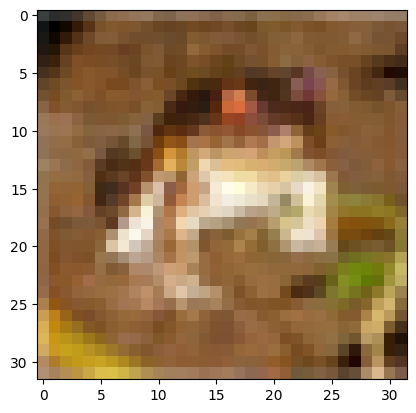

In [88]:
plt.imshow(X_train[0])
plt.show()

In [89]:
def enhance_image(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    enhanced_lab = cv2.merge((l, a, b))
    enhanced_image = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2RGB)
    enhanced_image = cv2.resize(enhanced_image, (64, 64), interpolation=cv2.INTER_CUBIC)
    return enhanced_image

In [90]:
x_train_enhanced = [enhance_image(img) for img in tqdm(X_train)]
x_test_enhanced = [enhance_image(img) for img in tqdm(X_test)]

100%|██████████| 10000/10000 [00:00<00:00, 13341.24it/s]


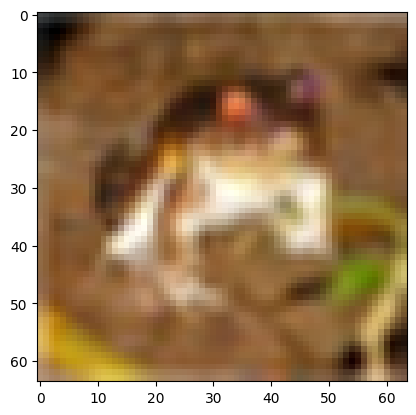

In [93]:
plt.imshow(x_train_enhanced[0])
plt.show()

In [94]:
x_train_enhanced = np.array(x_train_enhanced)
x_test_enhanced = np.array(x_test_enhanced)

In [95]:
val_size = 10000
x_val = X_train[:val_size]
X_train = X_train[val_size:]
x_val_enhanced = x_train_enhanced[:val_size]
x_train_enhanced = x_train_enhanced[val_size:]
y_val = y_train[:val_size]
y_train = y_train[val_size:]

In [102]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train_enhanced)

In [103]:
model_no_enhance = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [104]:
model_enhance = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [105]:
model_no_enhance.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
with tf.device('/GPU:0'):
    model_no_enhance.fit(datagen.flow(X_train, y_train, batch_size=32),
                         epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.2714 - loss: 2.2990 - val_accuracy: 0.3616 - val_loss: 1.9654
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.4082 - loss: 1.6394 - val_accuracy: 0.4803 - val_loss: 1.3956
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.4551 - loss: 1.5104 - val_accuracy: 0.4706 - val_loss: 1.5531
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.4939 - loss: 1.4233 - val_accuracy: 0.5144 - val_loss: 1.3741
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.5211 - loss: 1.3539 - val_accuracy: 0.6288 - val_loss: 1.0430
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.5327 - loss: 1.3085 - val_accuracy: 0.6066 - val_loss: 1.0786
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.5578 - loss: 1.2706 - val_accuracy: 0.6263 - val_loss: 1.0748
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.5810 -

In [106]:
model_enhance.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
with tf.device('/GPU:0'):
    model_enhance.fit(datagen.flow(x_train_enhanced, y_train, batch_size=32),
                         epochs=15, validation_data=(x_val_enhanced, y_val))

Epoch 1/15


2024-04-07 07:31:30.121665: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 0: 6.39927, expected 5.58886
2024-04-07 07:31:30.121723: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 1: 5.92185, expected 5.11143
2024-04-07 07:31:30.121733: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 2: 5.99669, expected 5.18628
2024-04-07 07:31:30.121742: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 3: 6.48891, expected 5.6785
2024-04-07 07:31:30.121750: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 5: 6.18882, expected 5.37841
2024-04-07 07:31:30.121758: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 6: 6.76108, expected 5.95067
2024-04-07 07:31:30.121766: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 7: 6.21291, expected 5.4025
2024-04-07 07:31:30.121774: E external/local_xla/xla/service/gpu

1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2061 - loss: 3.5582

2024-04-07 07:32:23.157317: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 23106: 6.38351, expected 5.64383
2024-04-07 07:32:23.157367: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 23194: 5.12334, expected 4.38367
2024-04-07 07:32:23.157385: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 23218: 6.35016, expected 5.61048
2024-04-07 07:32:23.157394: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 23240: 5.82993, expected 5.09026
2024-04-07 07:32:23.157402: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 23251: 6.18931, expected 5.44964
2024-04-07 07:32:23.157409: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 23270: 6.36522, expected 5.62554
2024-04-07 07:32:23.157417: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 23271: 6.05405, expected 5.31438
2024-04-07 07:32:23.157425: E exte

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.2062 - loss: 3.5517 - val_accuracy: 0.3673 - val_loss: 1.6844
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.2791 - loss: 1.9051 - val_accuracy: 0.3875 - val_loss: 1.5679
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.3148 - loss: 1.8163 - val_accuracy: 0.3618 - val_loss: 1.8023
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.3313 - loss: 1.7769 - val_accuracy: 0.3995 - val_loss: 1.5759
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 39ms/step - accuracy: 0.3542 - loss: 1.7352 - val_accuracy: 0.4174 - val_loss: 1.5990
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.3744 - loss: 1.6842 - val_accuracy: 0.4994 - val_loss: 1.3161
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.3907 - loss: 1.6371 - val_accuracy: 0.4957 - val_loss: 1.4445
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 51s 40ms/step - accuracy: 0.4008 - loss: 1.62

In [107]:
y_pred = model_no_enhance.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print('Validation Accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation Accuracy: 0.6693


In [108]:
y_pred = model_enhance.predict(x_test_enhanced)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
print('Validation Accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Accuracy: 0.5583
